## Name: Ziad Wael Abdl Hamed  ID: 20200211

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(200)
delta = np.random.uniform(-50, 30, size=(200,))
y = .4 * x + 3 + delta

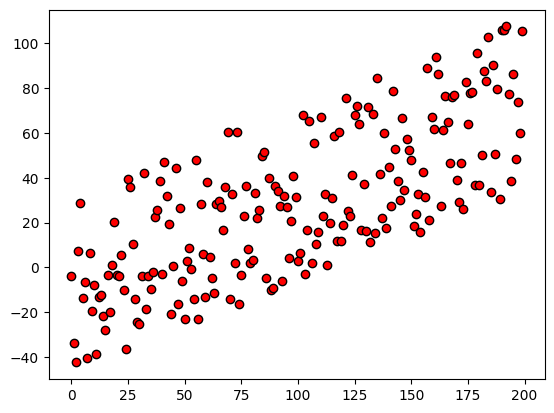

In [4]:
plt.scatter(x, y, color='red',edgecolors='black')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        y_pred = w * x[i] + b
        cost += (y_pred - y[i]) ** 2
    return cost / (2 * m)

In [12]:
w = 0
b = 0
learning_rate = 0.0001
cost_history = []
# Train model
for i in range(1000):
    # Compute gradients
    dw = 0
    db = 0
    for j in range(len(x_train)):
        y_pred = w * x_train[j] + b
        dw += (y_pred - y_train[j]) * x_train[j]
        db += y_pred - y_train[j]
    dw /= x_train.shape[0]
    db /= x_train.shape[0]
    
    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Compute cost and store it in history
    cost = compute_cost(x_train, y_train, w, b)
    cost_history.append(cost)
    
    # Print progress every 10 iterations
    if i % 10 == 0:
        print(f'Iteration {i}: cost={cost}, w={w}, b={b}')

print(f'Final: cost={cost}, w={w}, b={b}')


Iteration 0: cost=369.38786354367016, w=0.4295930945723556, b=0.002822589352038345
Iteration 10: cost=293.01490470637907, w=0.32254903842644517, b=-0.0017031971363057382
Iteration 20: cost=293.0010036149271, w=0.32257503053296877, b=-0.005431545486966968
Iteration 30: cost=292.9871098542361, w=0.32260275701819957, b=-0.009158900389524287
Iteration 40: cost=292.9732234002562, w=0.32263047624013325, b=-0.012885275057322725
Iteration 50: cost=292.95934424914566, w=0.3226581881723567, b=-0.016610669748358984
Iteration 60: cost=292.94547239706327, w=0.3226858928167865, b=-0.02033508472035124
Iteration 70: cost=292.93160784017044, w=0.32271359017533924, b=-0.024058520230949888
Iteration 80: cost=292.91775057463144, w=0.322741280249931, b=-0.027780976537737558
Iteration 90: cost=292.9039005966107, w=0.3227689630424773, b=-0.03150245389822914
Iteration 100: cost=292.8900579022762, w=0.32279663855489327, b=-0.03522295256987181
Iteration 110: cost=292.87622248779763, w=0.3228243067890934, b=-0.0

In [13]:
y_pred_test = w * x_test + b
mse_test = np.mean((y_pred_test - y_test) ** 2)
print(f'Testing MSE: {mse_test}')

Testing MSE: 521.0000354078442


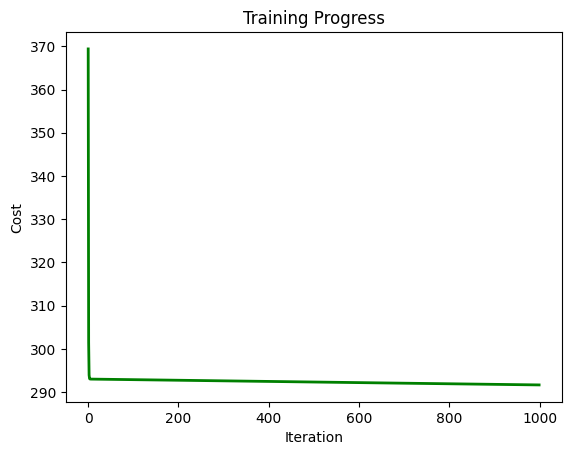

In [14]:
plt.plot(cost_history, color='green', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.show()

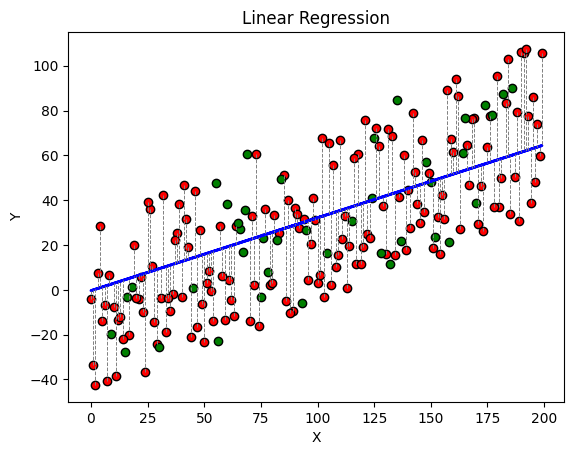

In [10]:
plt.scatter(x_train, y_train, color='red',edgecolors='black')
plt.scatter(x_test, y_test, color='green',edgecolors='black')
plt.plot(x_train, w * x_train + b, color='blue', linewidth=2)
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], w * x_train[i] + b], color='grey', linestyle='--', linewidth=0.7) #for the destance between the line and the point 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()